An LSTM neural network, or long short-term memory, is a type of recurrent neural network that can remember information for a long time and apply that stored data for future calculations. First proposed in 1997, an LSTM network is a deep learning algorithm that overcomes some of the problems recurrent neural networks face, including those associated with memory storage.

LSTM neural networks can be used for language translation, video analysis, keyword spotting, text-to-speech translation, and language modeling. This article explains how LSTM neural networks work and outlines how to start a career in the field.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

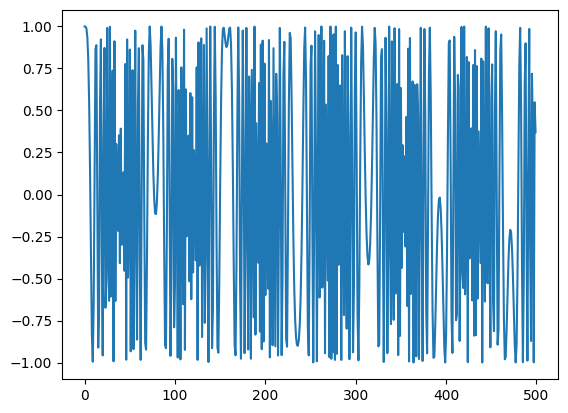

In [ ]:
# make dataset
s = np.cos((0.2*np.arange(500))**2)
plt.plot(s)

In [ ]:
T = 20
D =1
X =[]
Y = []
for i in range(len(s) - T):
  x = s[i:i+T]
  X.append(x)
  y = s[i+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # M X T
Y = np.array(Y)
print("X shape = ",X.shape, "Y shape is = ", Y.shape)

X shape =  (480, 20) Y shape is =  (480,)


In [ ]:
X = X.reshape(-1, T, 1) # Make it N x T x D; the correct shape for LSTM

# constructing the LSTM model
i = Input(shape = (T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse',
              optimizer = Adam(lr=0.05),
)
xtrain = X[:-250 // 2]
ytrain = Y[:-250 // 2]

xtest = X[-250 // 2:]
ytest = Y[-250 // 2:]

r = model.fit(xtrain, ytrain, batch_size = 32,
              epochs = 200,
              validation_data =(xtest, ytest))

Epoch 1/200
12/12 [==============================] - 3s 60ms/step - loss: 0.4775 - val_loss: 0.4714
Epoch 2/200
12/12 [==============================] - 0s 12ms/step - loss: 0.4764 - val_loss: 0.4764
Epoch 3/200
12/12 [==============================] - 0s 12ms/step - loss: 0.4756 - val_loss: 0.4774
Epoch 4/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4752 - val_loss: 0.4815
Epoch 5/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4750 - val_loss: 0.4796
Epoch 6/200
12/12 [==============================] - 0s 17ms/step - loss: 0.4745 - val_loss: 0.4811
Epoch 7/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4740 - val_loss: 0.4840
Epoch 8/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4735 - val_loss: 0.4845
Epoch 9/200
12/12 [==============================] - 0s 19ms/step - loss: 0.4733 - val_loss: 0.4904
Epoch 10/200
12/12 [==============================] - 0s 17ms/step - loss: 0.4723 - val_loss: 0.4915

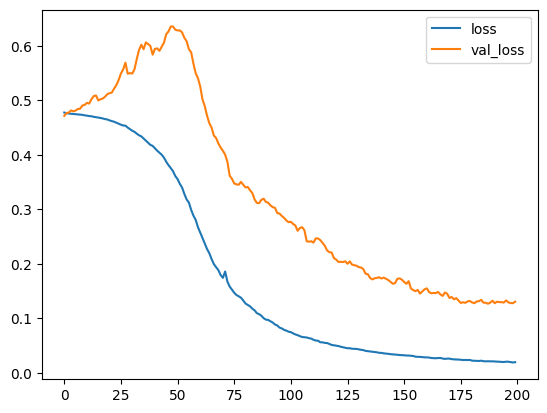

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

15/15 [==============================] - 0s 3ms/step


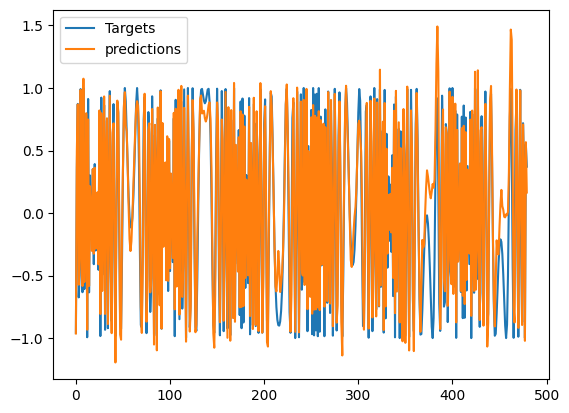

In [ ]:
# Forcasting
p = model.predict(X) # use the whole data for prediction
p = p[:,0]
plt.plot(Y, label = 'Targets')
plt.plot(p, label = 'predictions')
plt.legend()

In [ ]:
forecast = []
input = X[-250 // 2]
while len(forecast) < len(ytrain):
  pp = model.predict(input.reshape(1, T, 1))[0, 0]#reshape input to N x T x D
  forecast.append(pp)
  # make a new input with rhe latest forcast
  input = np.roll(input, -1) # shift data one step to left
  input[-1] = pp # place latest predicted value at last index

1/1 [==============================] - 0s 24ms/step


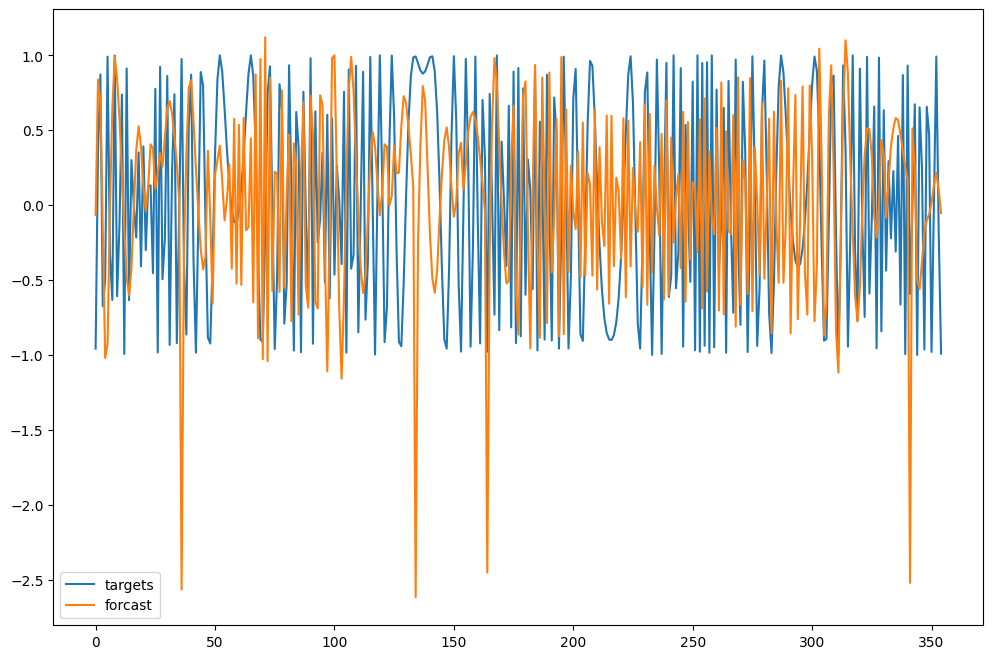

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot((ytrain), label = 'targets')
plt.plot(forecast, label = 'forcast')
plt.legend()
plt.show()